# Text Summariztion 

1. Using Kohonen maps

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from minisom import MiniSom
import numpy as np

# Example sentences
sentences = ["Sentence one...", "Sentence two..."]

# Vectorize
vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(sentences).toarray()

# Train SOM
som = MiniSom(10, 10, X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)

# Map sentences to BMUs
bmu_mapping = {}
for idx, x in enumerate(X):
    bmu = som.winner(x)
    bmu_mapping.setdefault(bmu, []).append(idx)

# Pick representative from each cluster
summary_sentences = []
for bmu, idxs in bmu_mapping.items():
    rep_idx = min(idxs, key=lambda i: np.linalg.norm(X[i] - som.get_weights()[bmu]))
    summary_sentences.append(sentences[rep_idx])

# Sort by original order
summary_sentences.sort(key=lambda s: sentences.index(s))
summary = " ".join(summary_sentences)
print(summary)


Sentence one...


2. K-means Clustering

In [2]:
# pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np

def kmeans_summary_tfidf(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences)            # sparse matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_          # dense

    rep_indices = []
    for cluster in range(K):
        idxs = np.where(labels == cluster)[0]
        if len(idxs) == 0:
            continue
        # compute distances from centroid -> choose nearest
        dists = np.linalg.norm(X[idxs].toarray() - centers[cluster], axis=1)
        rep = idxs[np.argmin(dists)]
        rep_indices.append(rep)

    # Order by original position for coherence
    rep_indices = sorted(rep_indices)
    summary = " ".join([sentences[i] for i in rep_indices])
    return summary


In [3]:
sntences_test = [
    "This Project represents the work related to Text Summarization. In this paper, we present a framework for summarizing the huge information",
    "Text Summarization is the process of identifying the most important and meaningful information in an input document",
    "IELTS Ready brings all our most popular IELTS preparation materials into one spot so you can easily browse what's on offer and track your progress.",
    "Get the IELTS score you're aiming for with our wealth of IELTS test preparation resources.",
    "Browse individual IELTS materials below, or sign up for IELTS Ready to access all our resources in one convenient platform. "
]

# summary = kmeans_summary_tfidf(sntences_test, K=2)
# print(summary)

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


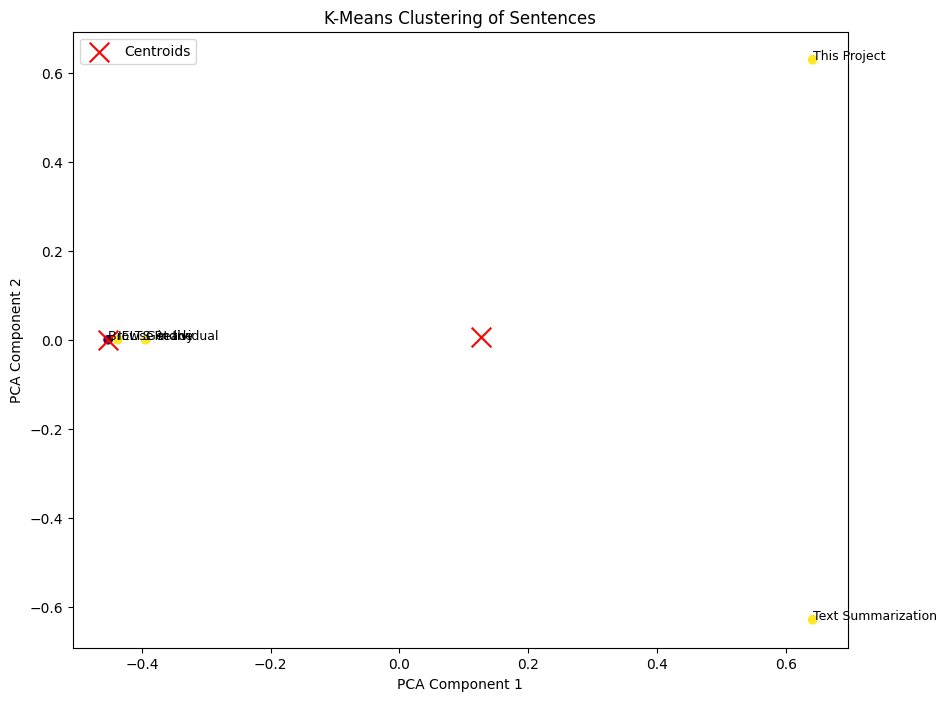

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_clusters(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences).toarray()  # dense matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
    
    for i, sentence in enumerate(sentences):
        plt.annotate(" ".join(sentence.split()[:2]), (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, color='black')

    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    
    plt.title('K-Means Clustering of Sentences')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

plot_kmeans_clusters(sntences_test, K=2)

TODO:
1. Instead of PCA: random forest feature extraction 
2. Kohonen Maps
3. 

## Extractive and Abstractive Summarization 

Extractive: selecting and concatenating important sentences or phrases directly from the source text.
- Frequency-based methods (tf-idf)
- Graph-based algorithms (TextRank and LexRank)
- Supervised machine learning

Abstractive: generate new sentences, rephrasing and compressing content, similar to how humans summarize
- Seq2Seq (Sequence-to-Sequence Models)
- Pointer-Generator Networks
- Transformers (BERT, GPT, BART, T5)

Hybrid Approaches: a model might first select key sentences (extractive) and then paraphrase or compress them (abstractive).

Specialized Techniques:
- Topic-based summarization (summaries tailored to specific user queries or topics, often used in search engines or QA systems)
- Multi-document summarization (summarizing multiple articles at once: e.g., news aggregation)
- Guided summarization: Summaries that follow specific guidelines, like focusing on certain aspects (e.g., medical findings, legal conclusions).


## Graph-Based Text Summarization

Graph-based ranking algorithms have revolutionized the field of text mining by providing efficient and effective ways to extract valuable information from large text corpora. These algorithms leverage the inherent structure of texts, representing them as graphs where nodes represent textual elements (words, sentences, or documents) and edges represent relationships between these elements.

PageRank, originally developed by Larry Page and Sergey Brin for ranking web pages, can be applied to text mining. In this context, PageRank ranks nodes (e.g., words or sentences) based on their importance within the text graph. It iteratively calculates a ranking score for each node, considering the number and quality of links to it.

In center: These words have the highest PageRank scores, indicating they are central to the text's topic and well-connected to other words.
Significance: These words are likely key themes or important concepts within the text.



PageRank Scores:
{'the': 0.09311359219749941, 'chernivtsi': 0.03780072200711822, 'national': 0.014689303718242628, 'university': 0.03780072200711822, 'is': 0.026315010503799897, 'a': 0.03780072200711822, 'public': 0.014689303718242628, 'in': 0.03780072200711822, 'city': 0.014689303718242628, 'of': 0.07141343888199432, 'western': 0.014689303718242628, 'ukraine.': 0.014689303718242628, 'one': 0.014689303718242628, 'leading': 0.014689303718242628, 'ukrainian': 0.014689303718242628, 'institutions': 0.014689303718242628, 'for': 0.014689303718242628, 'higher': 0.014689303718242628, 'education,': 0.014689303718242628, 'it': 0.014689303718242628, 'was': 0.026315010503799897, 'founded': 0.014689303718242628, '1875': 0.014689303718242628, 'as': 0.014689303718242628, 'franz-josephs-universität': 0.014689303718242628, 'czernowitz': 0.014689303718242628, 'when': 0.014689303718242628, '(czernowitz)': 0.014689303718242628, 'capital': 0.014689303718242628, 'duchy': 0.014689303718242628, 'bukovina,': 0

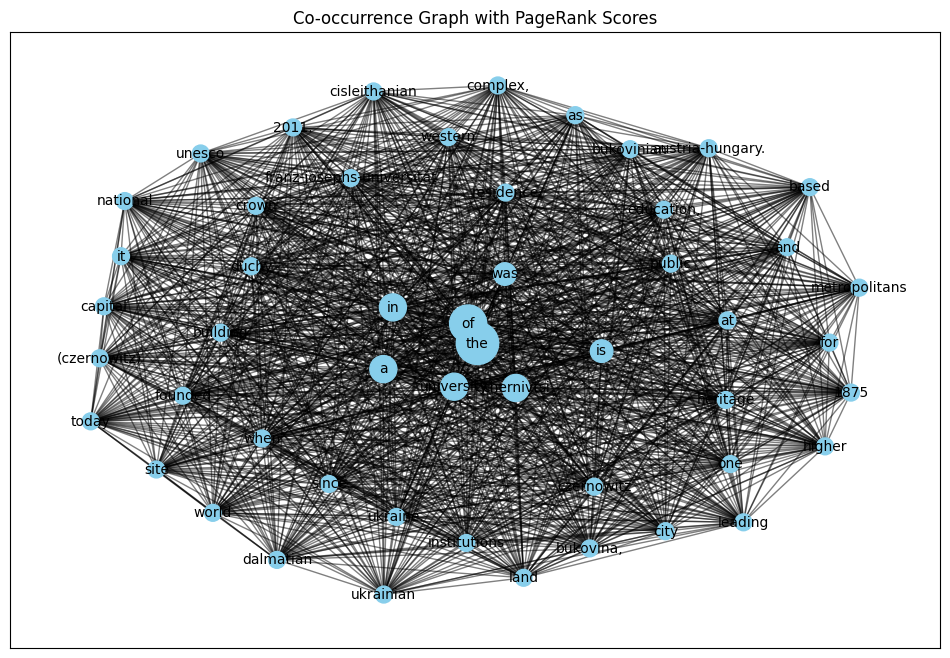

In [17]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

def preprocess_text(text):
    words = text.lower().split()
    return words

def build_co_occurrence_graph(words, window_size=2):
    G = nx.Graph()
    pairs = list(itertools.combinations(words, window_size))
    for pair in pairs:
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)
    return G

def apply_pagerank(G):
    pagerank_scores = nx.pagerank(G, weight='weight')
    return pagerank_scores

def generate_graph(G, pagerank_scores):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=[v * 10000 for v in pagerank_scores.values()], node_color='skyblue')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title("Co-occurrence Graph with PageRank Scores")
    plt.show()

# Example usage
texts = [
    "Graph-based text mining involves representing text data as a graph and using graph algorithms to extract meaningful patterns.",
    "The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine. One of the leading Ukrainian institutions for higher education, it was founded in 1875 as the Franz-Josephs-Universität Czernowitz when Chernivtsi (Czernowitz) was the capital of the Duchy of Bukovina, a Cisleithanian crown land of Austria-Hungary. Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a UNESCO World Heritage Site since 2011."
]

words = preprocess_text(texts[1])
G = build_co_occurrence_graph(words)
pagerank_scores = apply_pagerank(G)

print("PageRank Scores:")
print(pagerank_scores)

top_words = [score for score in pagerank_scores if pagerank_scores[score] > 0.02 and score not in ['the', 'is', 'in', 'and', 'of', 'a', 'to']]
print("Top words by PageRank:")
print(top_words)

generate_graph(G, pagerank_scores)

## Extractive Summarization

Extractive summarization algorithms automatically generate summaries by selecting and combining key passages from the original text. Unlike human summarizers, these models focus on extracting the most important sentences without creating new content. The goal is to preserve the meaning of the original text while condensing it.

The TextRank algorithm is widely used for extractive summarization tasks. By ranking sentences based on their relevance and importance, it can generate a concise summary. Let's explore how this algorithm works with a sample text.

In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import wikipedia
import en_core_web_sm

# Get wiki content.
wikisearch = wikipedia.page("Amitabh Bachchan")
wikicontent = wikisearch.content
nlp = en_core_web_sm.load()
doc = nlp(wikicontent)

# Save the wiki content to a file
# (for reference).
f = open("wikicontent.txt", "w")
f.write(wikicontent)
f.close()

# Summary (0.5% of the original content).
summ_per = summarize(wikicontent, ratio = 0.05)
print("Percent summary")
print(summ_per)

# Summary (200 words)
summ_words = summarize(wikicontent, word_count = 200)
print("Word count summary")
print(summ_words)

ModuleNotFoundError: No module named 'gensim.summarization'

## Text classification via SVM

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# Training dataset
texts = [
    # Tech
    "The new iPhone was released with improved battery life",
    "AI and machine learning are transforming the industry",
    "Microsoft announced a new update for Windows",

    # Culture
    "The art exhibition attracted thousands of visitors",
    "A new novel has become a bestseller worldwide",
    "The film festival showcased international movies",

    # Science
    "Astronomers discovered a new exoplanet orbiting a star",
    "Researchers published findings on climate change",
    "A breakthrough in quantum computing was achieved",

    # Sports
    "The football team won the championship final",
    "The Olympic Games will be held next summer",
    "A new world record was set in the 100m sprint"
]

labels = [
    "tech", "tech", "tech",
    "culture", "culture", "culture",
    "science", "science", "science",
    "sports", "sports", "sports"
]

# Build pipeline: TF-IDF + SVM
model = make_pipeline(TfidfVectorizer(), LinearSVC())

# Train model
model.fit(texts, labels)

# Test new examples
test_texts = [
    "NASA announced a mission to Mars",
    "Apple released a new software update",
    "The theater play received great reviews",
    "The basketball team secured a close victory"
]

predictions = model.predict(test_texts)

for txt, pred in zip(test_texts, predictions):
    print(f"Text: {txt}\n → Predicted category: {pred}\n")


Text: NASA announced a mission to Mars
 → Predicted category: tech

Text: Apple released a new software update
 → Predicted category: tech

Text: The theater play received great reviews
 → Predicted category: sports

Text: The basketball team secured a close victory
 → Predicted category: sports



## Text Rank Algorithm

TextRank is a graph-based ranking algorithm inspired by PageRank (used by Google to rank web pages).
Instead of ranking web pages, we rank sentences in a document by their importance.

- Split the document into sentences. Clean and tokenize words (remove stopwords, punctuation, etc.).
- Each sentence is turned into a set of words.
- Compute similarity between every pair of sentences (e.g., cosine similarity with TF-IDF, or word overlap).
- Each sentence = a node.
- Edge weight between two nodes = similarity score between sentences.
- Apply the PageRank algorithm on the graph.
- Sentences that are similar to many other sentences will get a higher score.
- Sort sentences by score.
- Pick the top N sentences as the summary.



In [ ]:
import networkx
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("punkt")

def textrank_text_summarizer(text, num_sentences=5):
    
    sentences = nltk.sent_tokenize(text)

    tfidvectorizer = TfidfVectorizer(
                                 ngram_range=(1,5),
                                 smooth_idf=True,
                                 use_idf=True)

    X = tfidvectorizer.fit_transform(sentences)
    similarity_matrix = (X * X.T).toarray()

    # build graph
    nx_graph = nx.from_numpy_array(similarity_matrix)

    # run PageRank
    scores = nx.pagerank(nx_graph)

    # sort sentences by score
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

    # extract summary (top 2 sentences)
    summary = " ".join([s for _, s in ranked_sentences[:2]])
    return summary

texts = [
    """The Chernivtsi National University is a public university in the city of Chernivtsi in Western Ukraine. 
    One of the leading Ukrainian institutions for higher education, it was founded in 1875 as the Franz-Josephs-Universität Czernowitz 
    when Chernivtsi (Czernowitz) was the capital of the Duchy of Bukovina, a Cisleithanian crown land of Austria-Hungary. 
    Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a 
    UNESCO World Heritage Site since 2011.
    Yuriy Fedkovych Chernivtsi National University consists of 17 buildings having a total of 105 units. 
    The total area is 110,800 square meters, including training buildings of 66 square meters.
    The architectural ensemble of the main campus of the university, the Residence of Bukovinian and Dalmatian Metropolitans, 
    is included on the list of UNESCO World Heritage Sites.
    The university operates Chernivtsi Botanical Garden, which features over a thousand different spices and an arboretum located 
    on the territory of the main campus.
    """
]

summary = textrank_text_summarizer(texts[0], num_sentences=2)
print(summary)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vmelnyk2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The architectural ensemble of the main campus of the university, the Residence of Bukovinian and Dalmatian Metropolitans, 
    is included on the list of UNESCO World Heritage Sites. Today the university is based at the Residence of Bukovinian and Dalmatian Metropolitans building complex, a 
    UNESCO World Heritage Site since 2011.


- add code to streamlit, options, add more design
- deploy streamlit
- graphrank : add transf/bert
- stemming, lemmatization, removal of stop words
- kohonen maps, etc.
